In [1]:
# Goals

# Softmax regression
# One vs All (one vs rest)
# One vs. One

# We can adapt 2class classifiers as the logistic regression classifier
# by generalizating with the One vs All and One vs One approach

# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# Utiliry Functions

# This function plots a different decision boundary:

plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
    
    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            
            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()
  
    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()


In [3]:
# this function will plot the probability of belonging to each class
# each column is the probability of belonging to a class and the row number is the sample number

def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In ths lab we will use the  iris dataset,  it consists of three different types of irises’ (Setosa y=0, Versicolour y=1, and Virginica y=2), petal and sepal length, stored in a 150x4 numpy.ndarray.

The rows being the samples and the columns: Sepal Length, Sepal Width, Petal Length and Petal Width.

The following plot uses the second two features:


In [4]:
pair=[1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target
np.unique(y)

array([0, 1, 2])

Text(0, 0.5, 'petal width')

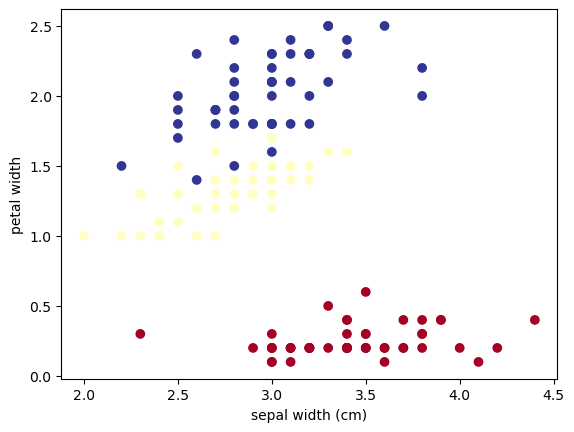

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")

## **Softmax Regression**  

SoftMax regression is similar to logistic regression, and the softmax function converts the actual distances, that is, dot products of $x$ with each of the parameters $\theta_i$ for the $K$ classes. This is converted to probabilities using the following: 

$softmax(x,i) = \frac{e^{ \theta_i^T \bf x}}{\sum_{j=1}^K e^{\theta_j^T x}} $

The training procedure is almost identical to logistic regression. Consider the three-class example where $y \in \{0,1,2\}$ we would like to classify $x_1$. We can use the softmax function to generate a probability of how likely the sample belongs to each class:

$[softmax(x_1,0),softmax(x_1,1),softmax(x_1,2)]=[0.97,0.2,0.1]$

The index of each probability is the same as the class. We can make a prediction using the argmax function:

$\hat{y}=argmax_i  \{softmax(x,i)\}$

For the previous example, we can make a prediction as follows:

$\hat{y}=argmax_i  \{[0.97,0.2,0.1]\}=0$

The <code>sklearn</code> does this automatically, but we can verify the prediction step, as we fit the model:



In [6]:
lr = LogisticRegression(random_state=0).fit(X, y)

In [7]:
# Generating the probability using the method predict_proba:

probability=lr.predict_proba(X)


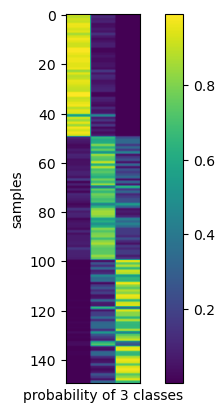

In [8]:
# Plotting the probability:

plot_probability_array(X,probability)

In [9]:
# For the first sample:

probability[0,:]

array([9.57671606e-01, 4.22321095e-02, 9.62845517e-05])

In [11]:
# It sums to one:

probability[0,:].sum()

1.0

In [12]:
# Applying the argmax function:

np.argmax(probability[0,:])

0

In [13]:
# Applying argmax to each sample:

softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
# Comparing what we have done with the method predict from sklearn:

yhat =lr.predict(X)
accuracy_score(yhat,softmax_prediction)

1.0

**We can't use Softmax regression for SVMs**

# SVM

Sklean performs Multi-class Classification automatically, we can apply the method and calculate the accuracy. Train a SVM classifier with the `kernel` set to `linear`, `gamma` set to `0.5`, and the `probability` paramter set to `True`, then train the model using the `X` and `y` data.


In [19]:
# SVM

X1 = X[:, 0]  # First column of X
X2 = X[:, 1]  # Second column of X




In [20]:
X1

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [21]:
X2

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

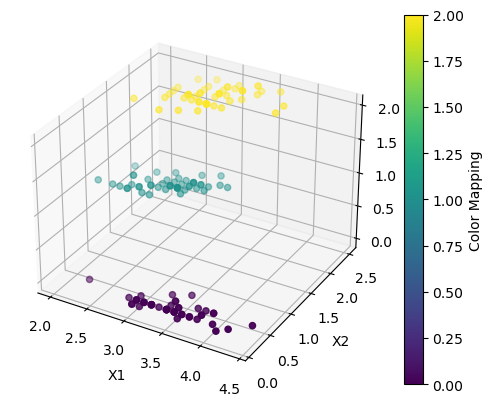

In [23]:
# Create a colormap (you can choose a different one if you prefer)
cmap = plt.get_cmap('viridis')

# Create a 3D scatter plot with colors based on 'y'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'y' as the color based on the colormap
sc = ax.scatter(X1, X2, y, c=y, cmap=cmap, marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

# Add a color bar to show the mapping from 'y' to colors
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Color Mapping')

plt.show()

In [24]:
# Creating a SVM classifier:

# Libraries:

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [25]:
# Splitting data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Implementing the classifier:

clf = svm.SVC(kernel='linear', gamma=0.5, probability=True)

The gamma parameter in a Support Vector Machine (SVM) is a crucial hyperparameter that determines the shape of the decision boundary. It controls the influence of individual training samples on the decision boundary. Specifically, the gamma parameter controls the reach or "spread" of the SVM's decision boundary and has different effects depending on its value:

1. **Small Gamma (Low Gamma):**
   - A smaller gamma value (e.g., close to zero) makes the decision boundary smoother and more generalized.
   - It results in a larger margin and a simpler decision function.
   - The influence of each training example on the decision boundary is more widespread.

2. **Large Gamma (High Gamma):**
   - A larger gamma value (e.g., higher values) makes the decision boundary more complex and tightly fit to the training data.
   - It results in a smaller margin and a more intricate decision function.
   - The influence of each training example on the decision boundary is more localized, with the SVM focusing on individual data points or clusters.

In summary, a small gamma value leads to a more "flexible" decision boundary that may generalize better to unseen data, whereas a large gamma value results in a more "rigid" decision boundary that fits the training data closely but might not generalize well.

The choice of the gamma parameter is crucial when training SVM models because it directly impacts the model's bias-variance trade-off. A smaller gamma can help prevent overfitting, while a larger gamma can lead to overfitting if not used judiciously.

Selecting an appropriate gamma value often involves hyperparameter tuning, such as using techniques like grid search or cross-validation to find the best gamma value for your specific dataset and problem. The optimal gamma value can vary depending on the characteristics of the data and the nature of the classification problem.

In [27]:
# Fitting the classifier to our data:

clf.fit(X_train, y_train)

SVC(gamma=0.5, kernel='linear', probability=True)

In [28]:
# Making predictions:

y_pred = clf.predict(X_test)

In [29]:
# Evaluating accuracy:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


{0, 1, 2}


C:\Users\Miuler BM\AppData\Local\Temp\ipykernel_9604\2561275316.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


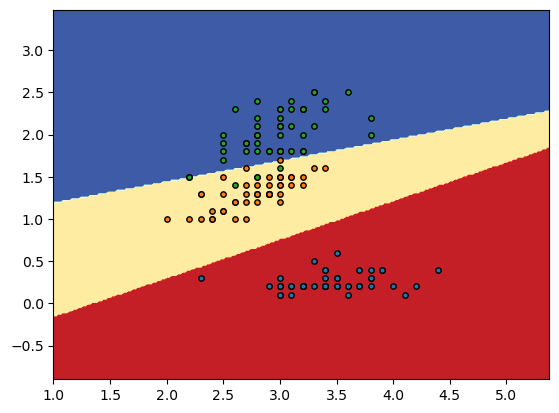

In [31]:
# Plotting the decision_boundary:

decision_boundary (X,y,clf,iris)

## About the Decision Boundary

The decision boundary is a line, hyperplane, or more complex boundary that separates different classes or categories of data points in a dataset. Its primary purpose is to help the SVM classify new, unseen data points into one of these categories.

Here's a concise and easy-to-understand explanation:

**Decision Boundary:** The decision boundary is like an imaginary line drawn by the SVM to separate different groups of data points. It's placed in such a way that it maximizes the margin (distance) between the nearest data points of different classes. 

- **For a binary classification problem:** In a binary SVM, there are two classes (e.g., positive and negative). The decision boundary is a line or hyperplane that separates the positive data points from the negative ones. New data points falling on one side of this boundary are classified as belonging to one class, while those on the other side are classified as belonging to the other class.

- **For a multi-class classification problem:** In multi-class SVM, the decision boundary is a more complex surface that separates multiple classes. It aims to create regions in the feature space for each class while maximizing the separation between them.

The goal of the SVM is to find the best decision boundary that not only separates the training data correctly but also generalizes well to unseen data. This is achieved by finding the optimal hyperplane with the maximum margin, which minimizes the classification error and maximizes the model's robustness.

In essence, the decision boundary is what allows an SVM to make predictions about the category or class to which a new data point belongs based on its position relative to this boundary. If a new data point falls on one side of the decision boundary, it's assigned to one class; if it falls on the other side, it's assigned to a different class.

# One vs. All (One-vs-Rest)

For one-vs-all classification, if we have K classes, we use K two-class classifier models. The number of class labels present in the dataset is equal to the number of generated classifiers. First, we create an artificial class we will call this "dummy" class. For each classifier, we split the data into two classes. We take the class samples we would like to classify, the rest of the samples will be labelled as a dummy class. We repeat the process for each class. To make a  classification, we use the classifier with the highest probability, disregarding the dummy class.

## Train Each Classifier

Here, we train three classifiers and place them in the list <code>my_models</code>. For each class we take the class samples we would like to classify, and the rest will be labelled as a dummy class. We repeat the process for each class. For each classifier, we plot the decision regions. The class we are interested in is in red, and the dummy class is in blue. Similarly, the class samples are marked in blue, and the dummy samples are marked with a black x. 


{0, 1, 2}


C:\Users\Miuler BM\AppData\Local\Temp\ipykernel_9604\2561275316.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


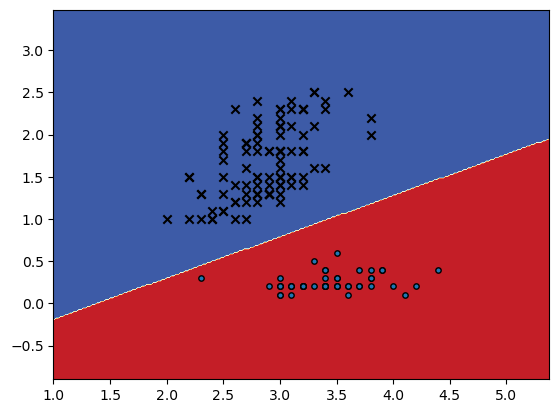

{0, 1, 2}


C:\Users\Miuler BM\AppData\Local\Temp\ipykernel_9604\2561275316.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


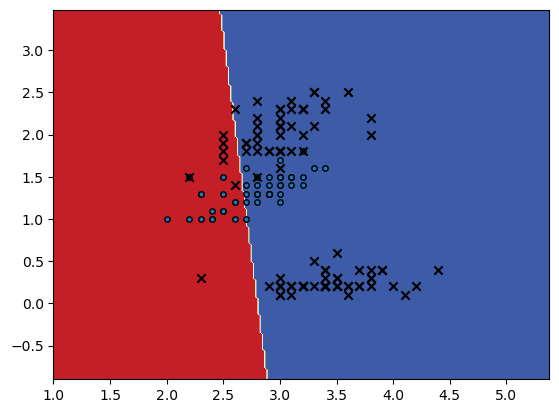

{0, 1, 2}


C:\Users\Miuler BM\AppData\Local\Temp\ipykernel_9604\2561275316.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


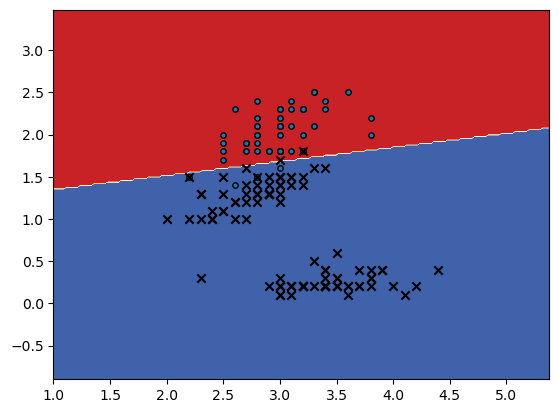

In [32]:
#dummy class
dummy_class=y.max()+1
#list used for classifiers 
my_models=[]
#iterate through each class
for class_ in np.unique(y):
    #select the index of our  class
    select=(y==class_)
    temp_y=np.zeros(y.shape)
    #class, we are trying to classify 
    temp_y[y==class_]=class_
    #set other samples  to a dummy class 
    temp_y[y!=class_]=dummy_class
    #Train model and add to list 
    model=SVC(kernel='linear', gamma=.5, probability=True)    
    my_models.append(model.fit(X,temp_y))
    #plot decision boundary 
    decision_boundary (X,temp_y,model,iris)


In [33]:
# Calculating the probability for each sample (not including dummy class):

probability_array=np.zeros((X.shape[0],3))
for j,model in enumerate(my_models):

    real_class=np.where(np.array(model.classes_)!=3)[0]

    probability_array[:,j]=model.predict_proba(X)[:,real_class][:,0]

In [34]:
# Showing the probability of belongig to each class for the first sample:

probability_array[0,:]

array([9.91477942e-01, 1.23903485e-01, 6.53448622e-12])

In [35]:
# Doesn't sum to one, because is the probability of belonging to the actual class and not the dummy

probability_array[0,:].sum()

1.115381426883677

### More about this idea!

In a normal binary classification problem, you have two classes, let's say "Class A" and "Class B," and the probabilities sum to 1 because the model is saying something like:

- "There's a 70% chance it's Class A."
- "There's a 30% chance it's Class B."

So, in binary classification, the probabilities add up to 100% or 1.

However, in your case, you're dealing with a multiclass classification problem with three classes (0, 1, and 2). When you apply the "One-vs-Rest" or "One-vs-All" strategy and consider Class 0 while treating 1 and 2 as a dummy class, the SVM for Class 0 is saying something like:

- "There's a 70% chance it's Class 0."

But it doesn't give you explicit probabilities for the dummy classes 1 and 2. They're treated as "not Class 0," and the SVM doesn't specify how likely they are because it's only designed to give you probabilities for one class at a time.

So, the probabilities don't add up to 1 (or 100%) because you're not getting probabilities for all classes at once. The SVM only provides probabilities for the specific class it's considering (Class 0 in this case), and the rest are treated as "not Class 0," which includes both the actual Class 1 and Class 2 and your dummy class. Therefore, the probabilities provided by the SVM don't necessarily sum to 1, as they only represent the confidence for one class relative to the others.

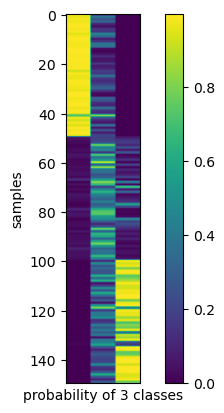

In [38]:
# plotting probability

plot_probability_array(X,probability_array)

In [39]:
# Applying argmax:

one_vs_all=np.argmax(probability_array,axis=1)
one_vs_all

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [40]:
# Accuracy:

accuracy_score(y,one_vs_all)

0.9466666666666667

In [41]:
# Less than the obtained by sklearn, because for SVM sklearn uses one vs one

accuracy_score(one_vs_all,yhat)

0.9733333333333334

# One vs One


In One-vs-One classification, we split up the data into each class, and then train a two-class classifier on each pair of classes. For example, if we have class 0,1,2, we would train one classifier on the samples that are class 0 and class 1, a second classifier on samples that are of class 0 and class 2, and a final classifier on samples of class 1 and class 2.

For $K$ classes, we have to train $K(K-1)/2$ classifiers. So, if $K=3$, we have $(3x2)/2=3 $classes.

To perform classification on a sample, we perform a majority vote and select the class with the most predictions. 

In [42]:
# List each class:

classes_=set(np.unique(y))
classes_

{0, 1, 2}

In [44]:
# Number of classifiers:

K=len(classes_)
K*(K-1)/2

3.0

We then train a two-class classifier on each pair of classes. We plot the different training points for each of the two classes. 

class 0 vs class 1 


C:\Users\Miuler BM\AppData\Local\Temp\ipykernel_9604\2561275316.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


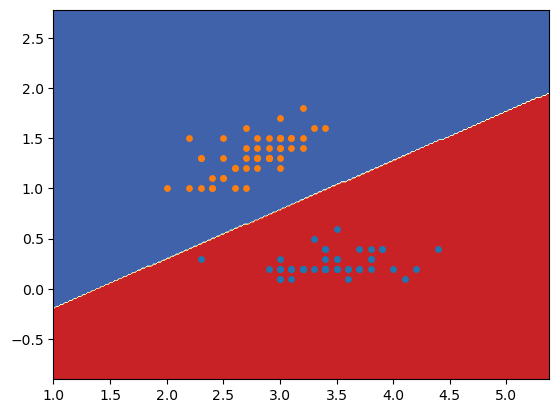

class 0 vs class 2 


C:\Users\Miuler BM\AppData\Local\Temp\ipykernel_9604\2561275316.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


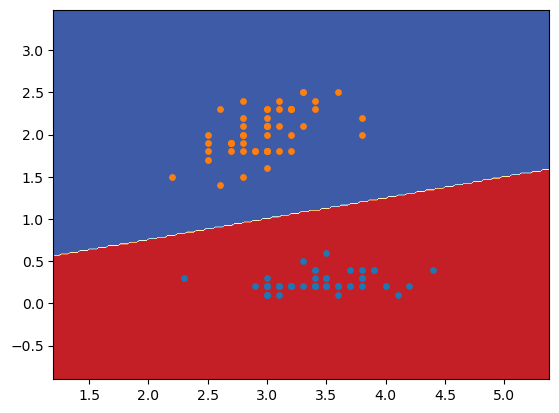

class 1 vs class 2 


C:\Users\Miuler BM\AppData\Local\Temp\ipykernel_9604\2561275316.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


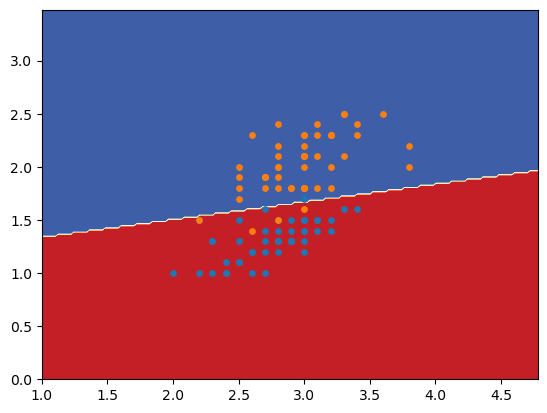

In [45]:
pairs=[]
left_overs=classes_.copy()
#list used for classifiers 
my_models=[]
#iterate through each class
for class_ in classes_:
    #remove class we have seen before 
    left_overs.remove(class_)
    #the second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_)+' and '+str(second_class))
        print("class {} vs class {} ".format(class_,second_class) )
        temp_y=np.zeros(y.shape)
        #find classes in pair 
        select=np.logical_or(y==class_ , y==second_class)
        #train model 
        model=SVC(kernel='linear', gamma=.5, probability=True)  
        model.fit(X[select,:],y[select])
        my_models.append(model)
        #Plot decision boundary for each pair and corresponding Training samples. 
        decision_boundary (X[select,:],y[select],model,iris,two=True)
   
        
    

In [46]:
pairs

['0 and 1', '0 and 2', '1 and 2']

As we can see, our data is left-skewed, containing more "5" star reviews. 

Here, we are plotting the distribution of text length.


In [47]:
pairs
majority_vote_array=np.zeros((X.shape[0],3))
majority_vote_dict={}
for j,(model,pair) in enumerate(zip(my_models,pairs)):

    majority_vote_dict[pair]=model.predict(X)
    majority_vote_array[:,j]=model.predict(X)

In the following table, each column is the output of a classifier for each pair of classes and the output is the prediction:


In [48]:
pd.DataFrame(majority_vote_dict).head(10)

,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


To perform classification on a sample, we perform a majority vote, that is, select the class with the most predictions. We repeat the process for each sample. 


In [49]:
one_vs_one=np.array([np.bincount(sample.astype(int)).argmax() for sample  in majority_vote_array]) 
one_vs_one
    

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [50]:
# Accuracy:

accuracy_score(y,one_vs_one)

0.96

In [51]:
# Sklearn comparison:

accuracy_score(yhat,one_vs_one)

1.0